# SHAP all models in a folder

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import glob

import numpy as np
import pandas as pd

from src.dataset.make_dataset import Dataset
from src.features.build_features import *
from src.features.utils import convert_category_cols_lgb
from src.model.train import *
from src.model.utils import load_model
from src.visualization.model_visualizer import *

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

%matplotlib inline

In [4]:
ds = Dataset()
ds.load_dataset()

In [5]:
build_processed_dataset(ds)

In [6]:
convert_category_cols_lgb(ds)

## Analyze all models in a folder

In [9]:
folder = "lgb_09062019_1533"
all_models = [load_model(f"{folder}/{os.path.basename(path)[0:6]}") for path in glob.glob(f"../../models/{folder}/*.dat")]
all_tvs = [TreeVisualizer(model, ds.X_train.sample(5000, random_state=i)) for i, model in enumerate(all_models)]

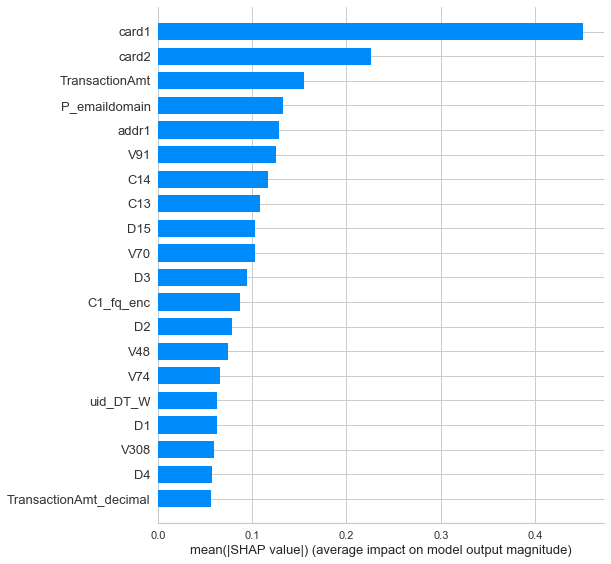

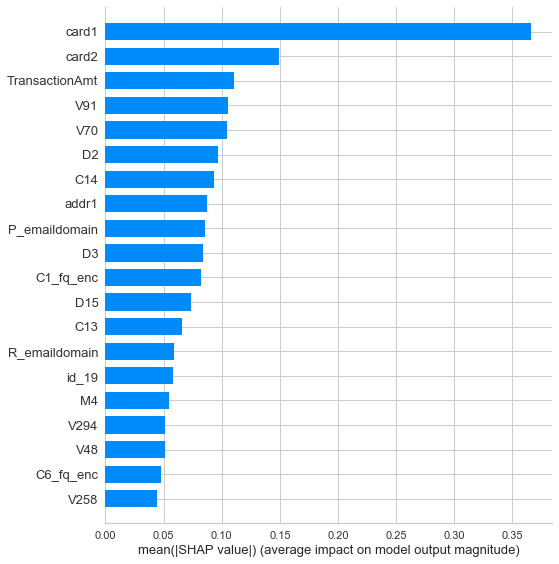

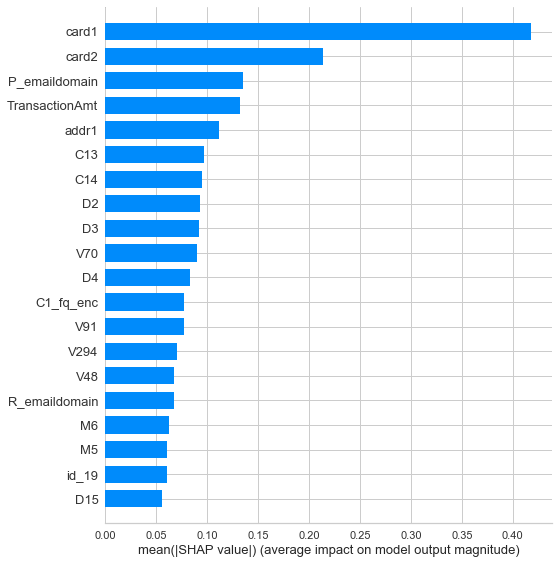

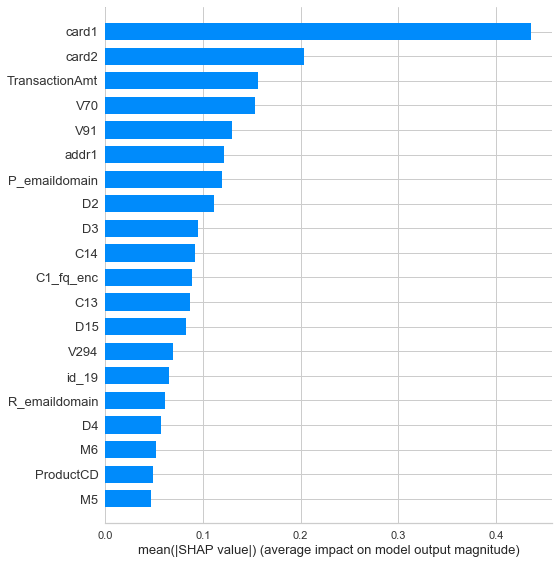

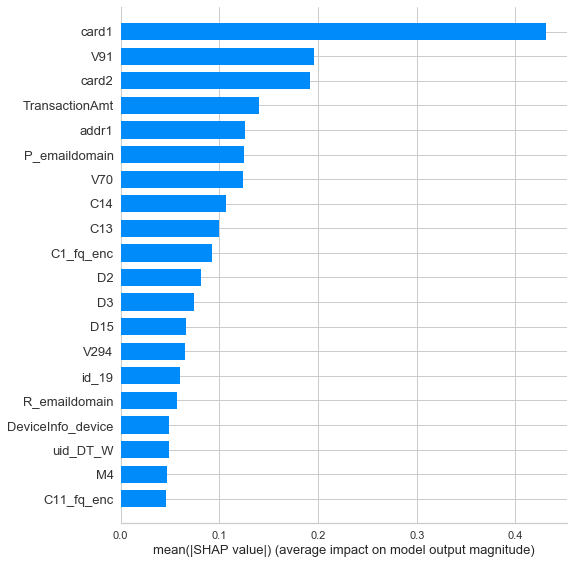

In [10]:
for i, tv in enumerate(all_tvs):
    tv.summary_bar_plot()

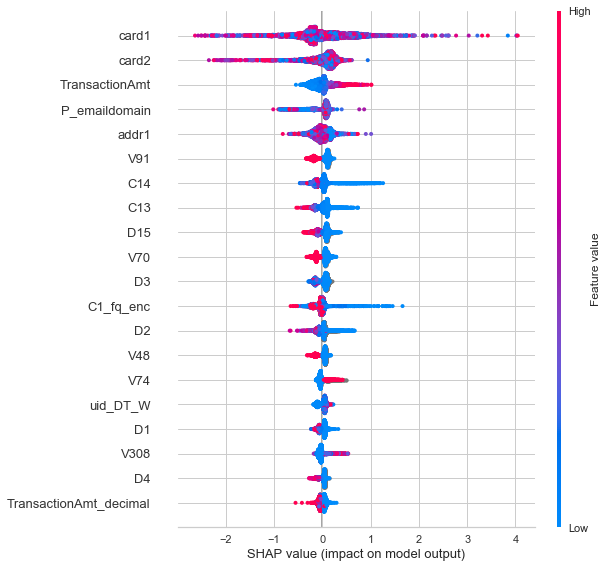

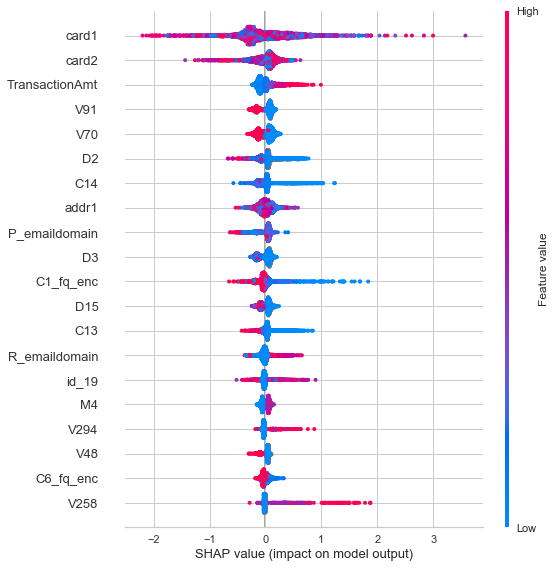

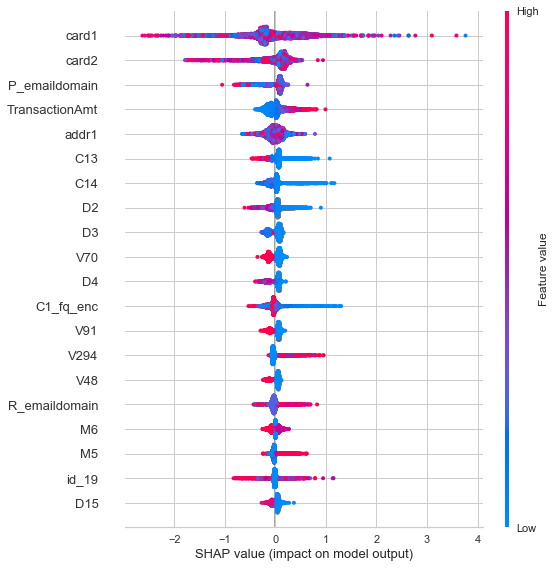

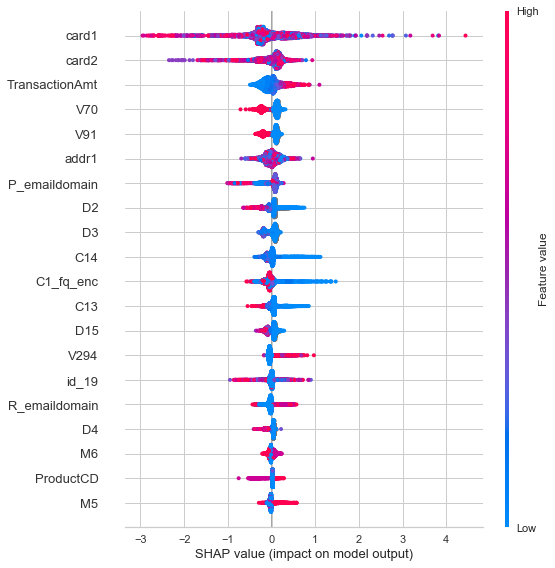

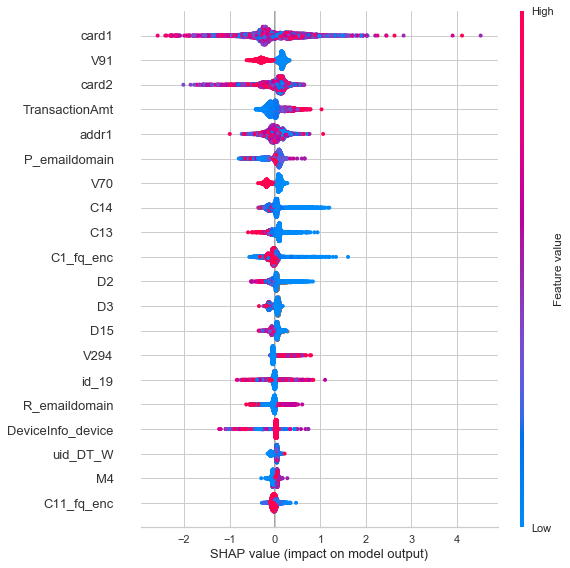

In [11]:
for i, tv in enumerate(all_tvs):
    tv.summary_plot()

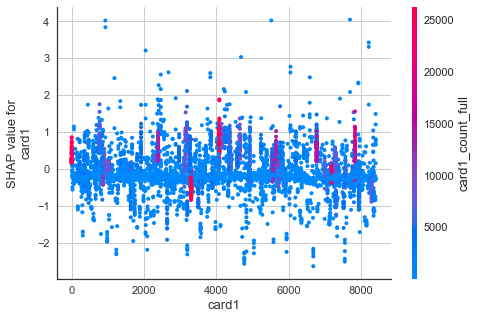

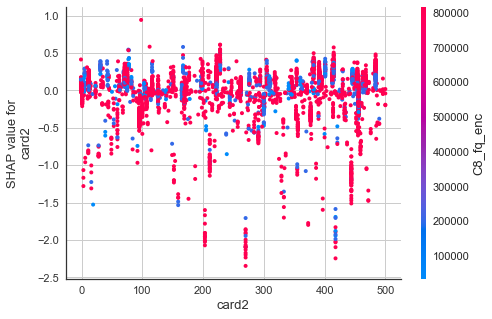

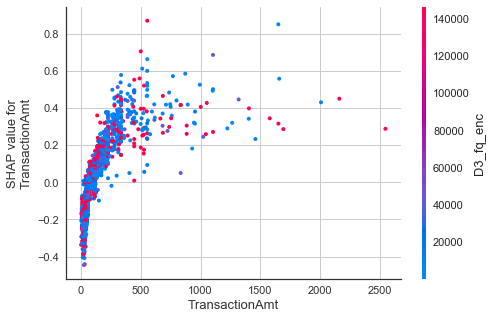

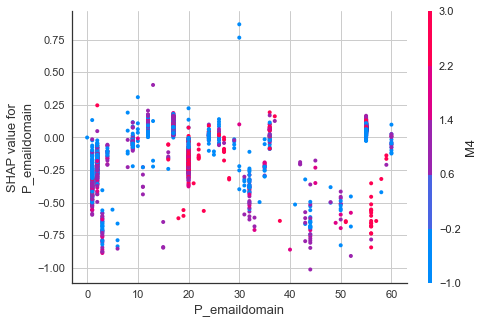

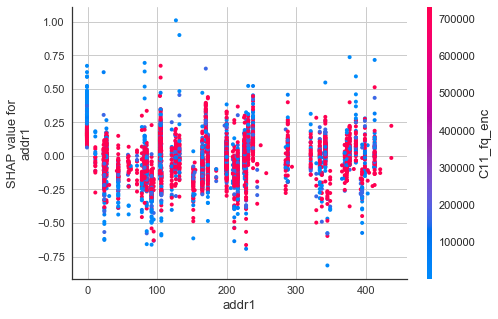

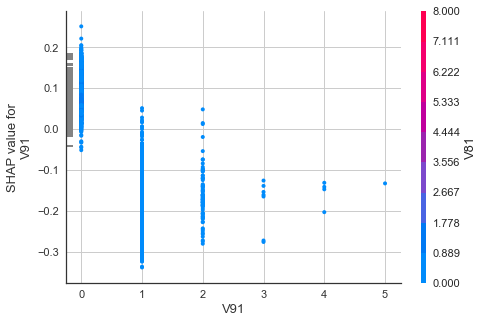

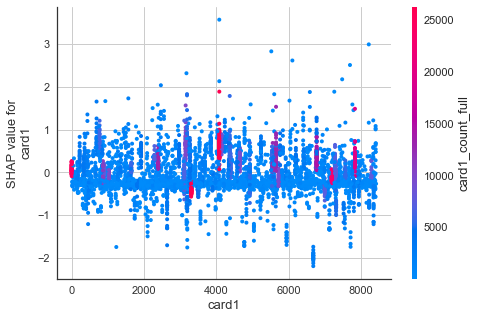

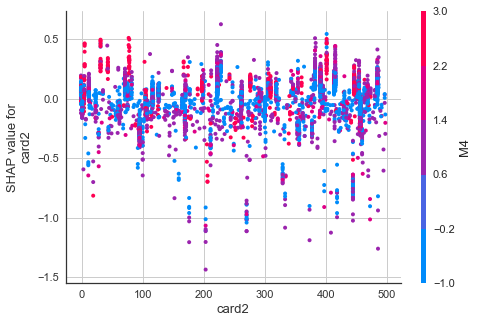

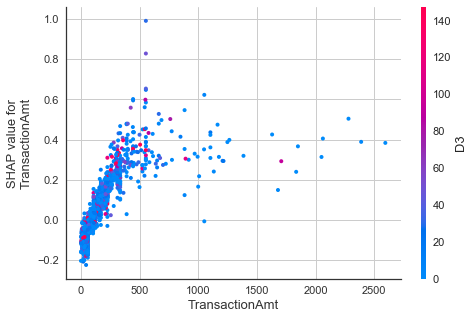

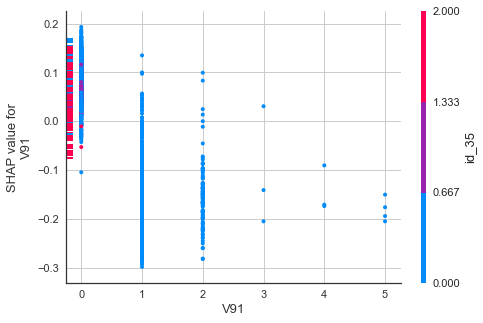

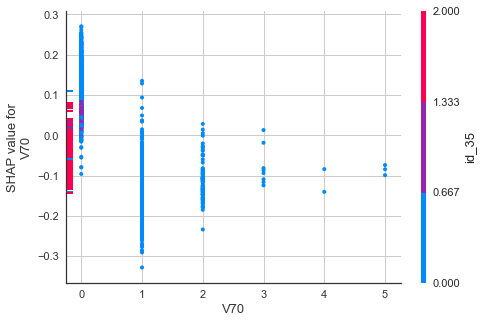

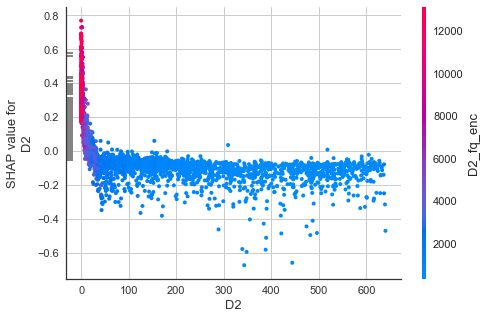

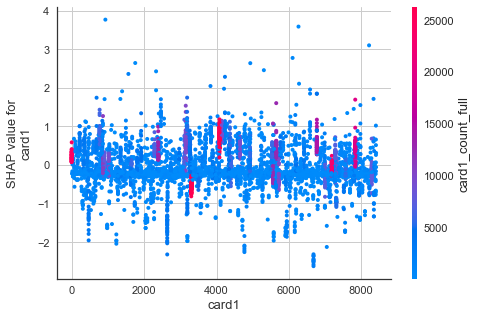

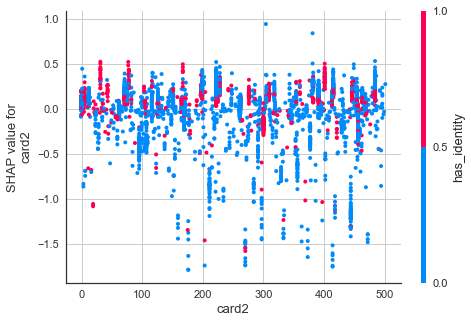

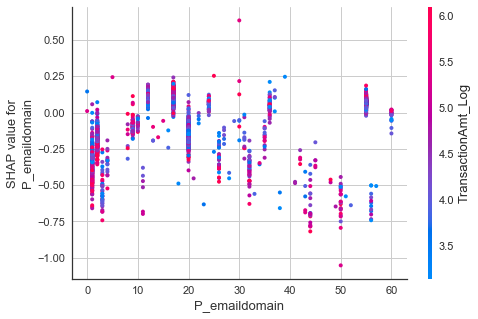

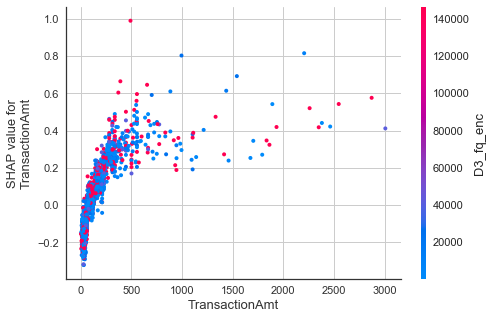

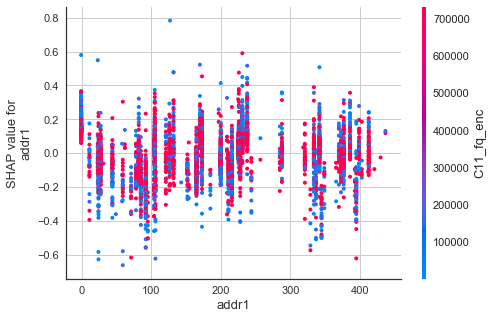

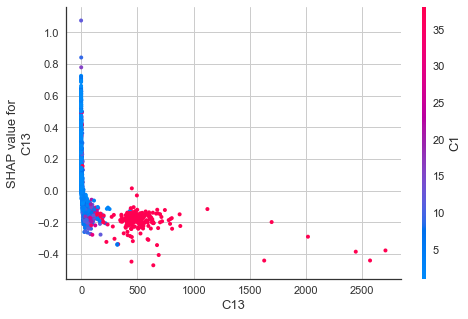

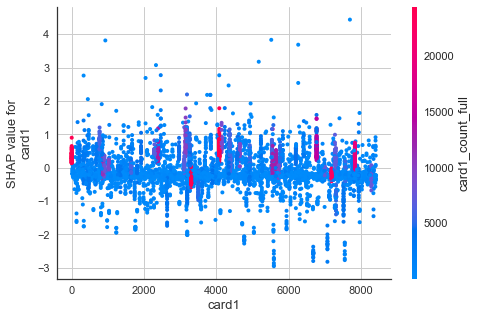

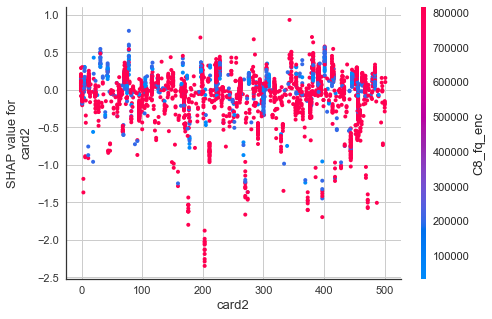

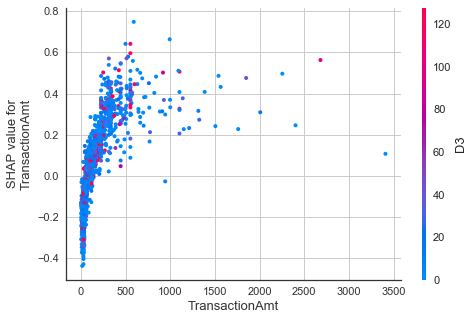

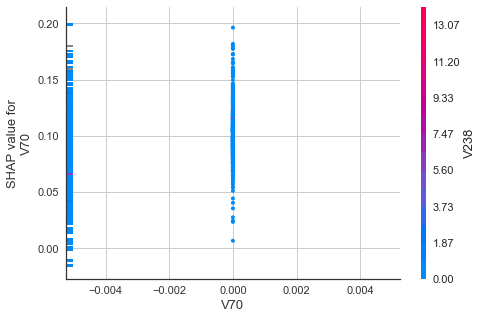

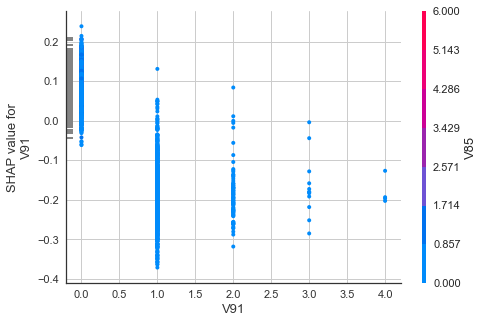

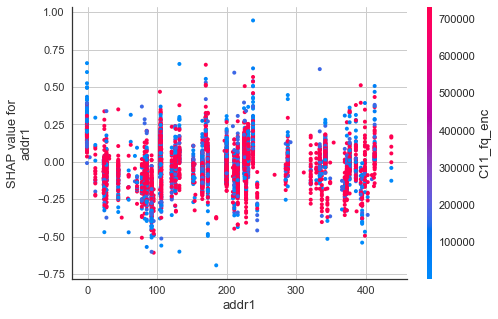

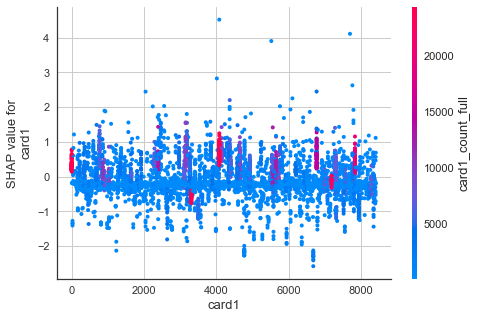

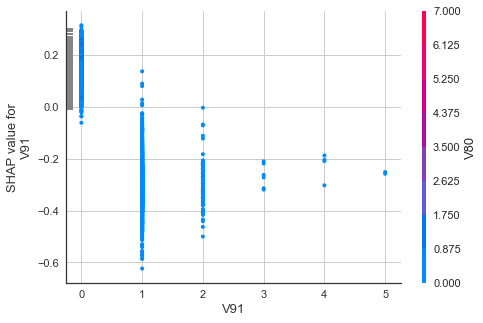

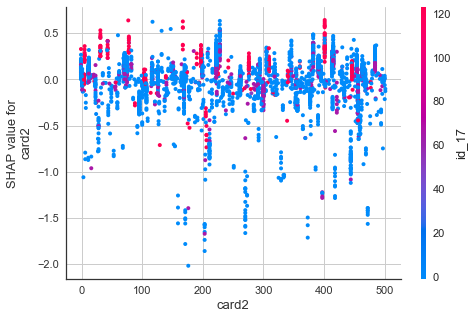

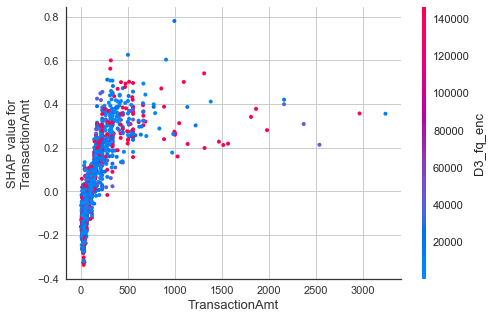

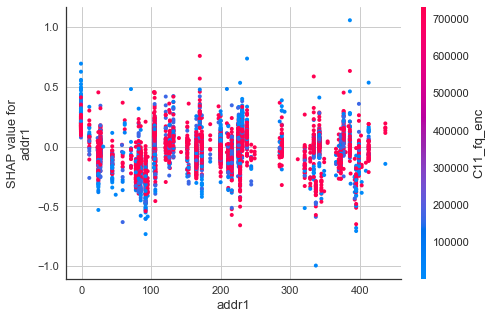

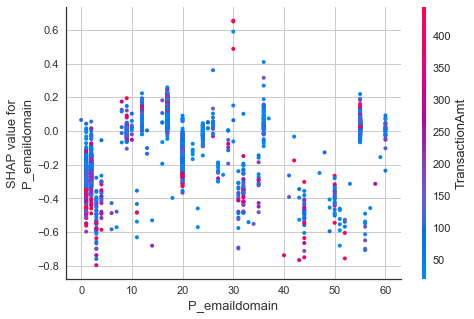

In [14]:
for i, tv in enumerate(all_tvs):
    for i in range(6):
        tv.dependence_plot(f'rank({i})')